### Notebook 2_7

## Interpret Bode

#### Student Learning Outcomes
* Learn the cut-off freq.
* Learn the concept of Zeros and Poles and how they contribute to Bode.
* Learn the Zero-Pole-Gain Form.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Bode Mag and Zero/Pole</h2>
</div>

In this task, let's explore more on Bode Magnitude plots and transfer functions.

Modify the code below, plot Bode Mag for 2 different transfer functions on the same figure:
* $H_1(s)=\dfrac{1}{s+5}$
* $H_2(s)=\dfrac{s+0.05}{1}$

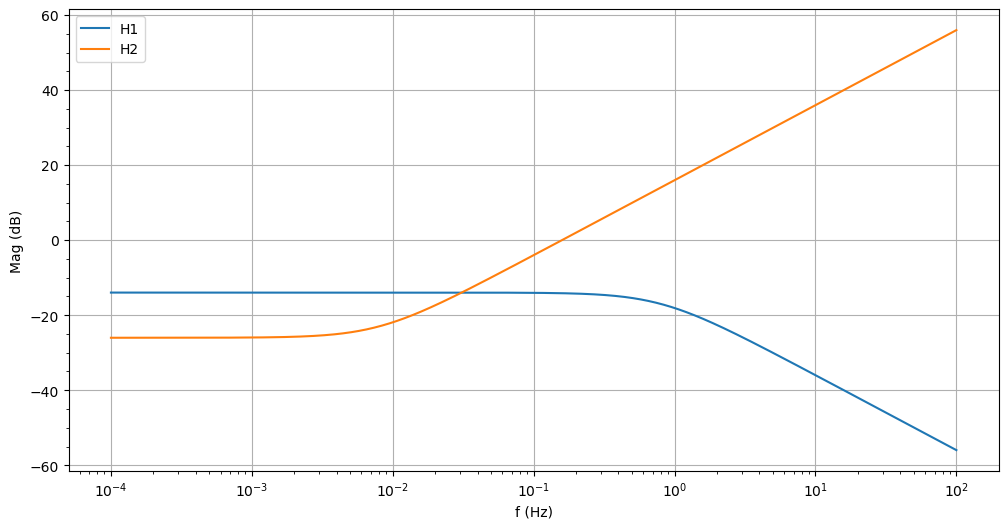

In [6]:
f_bode = np.logspace(-4,2,1000)
w_bode = f_bode*2*np.pi
num_task1 = [1]
den_task1 = [1, 5]
Hs_bode1 = sig.lti(num_task1, den_task1)
_, mag_bode1, _ = sig.bode(Hs_bode1, w=w_bode )

num_task2 = [1, 0.05]
den_task2 = [1]
Hs_bode2 = sig.lti(num_task2, den_task2)
_, mag_bode2, _ = sig.bode(Hs_bode2, w=w_bode )

plt.figure(figsize=(12, 6))
plt.semilogx(f_bode, mag_bode1, label='H1')
plt.semilogx(f_bode, mag_bode2, label='H2')
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")
plt.legend()


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python result: 1 pt</strong>
</span>

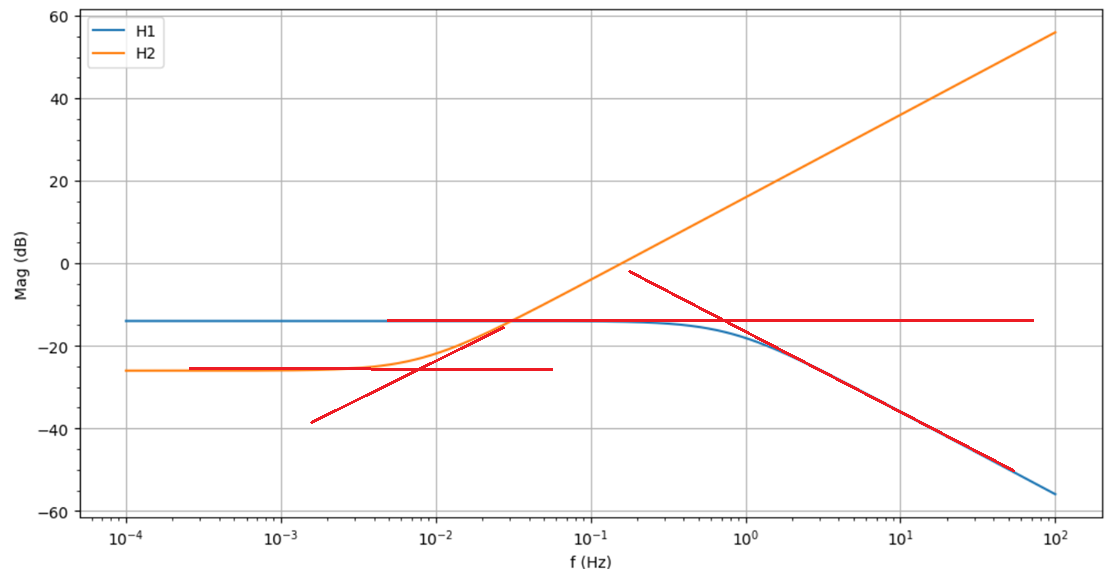

From your transfer function, Calculate such:
* DC gain for both transfer functions (in dB)
* root of the equation $s+5=0$
* root of the equation $s+0.05=0$

Next, from your Python plot, observe such:
* DC gain for both transfer functions.
* Cut-off frequency for $H_1(s)$ Bode Mag, convert Hz to rad/s
* Cut-off frequency for $H_1(s)$ Bode Mag, convert Hz to rad/s

The **cut-off freq** can be estimated by linking two straight lines and locating their intersection.

Does your theoretical calculations match the observations?

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Calcaltion and Observation result: 1 pt</strong>
</span>

In [7]:
## DC Gain compute
H1_gain = 1/5
H1_gain_in_dB = 20*np.log10(H1_gain)
print("H1 DC Gain is: ", H1_gain_in_dB)

H2_gain = 0.05/1
H2_gain_in_dB = 20*np.log10(H2_gain)
print("H2 DC Gain is: ", H2_gain_in_dB )

H1 DC Gain is:  -13.979400086720375
H2 DC Gain is:  -26.020599913279625


**Answer**

**From transfer function, I got**
* DC gain for H1 -14.0 dB; DC Gain for H2 is -26.0 dB
* root of the equation $s+5=0$ is $s=-5$
* root of the equation $s+0.05=0$ is $s=-0.05$

In [9]:
## cut-off compute
H1_cutoff = 8E-1
print("H1 cutoff freq (rad/s) is: ", H1_cutoff*2*np.pi)

H2_cutoff = 8E-3
print("H2 cutoff freq (rad/s) is: ", H2_cutoff*2*np.pi)

H1 cutoff freq (rad/s) is:  5.026548245743669
H2 cutoff freq (rad/s) is:  0.05026548245743669


**From plot observation, I got**
* DC gain for H1 is -14 dB; DC gain for H2 is -25 dB
* H1 cut-off freq is $8\times10^{-1}$ Hz, is 5.0 rad/s
* H2 cut-off freq is $8\times10^{-3}$ Hz, is 0.05 rad/s

----------

In systems, we have a formal naming:
* **Zero(s)**: Root(s) of the numerator of the transfer function.
* **Pole(s)**: Root(s) of the denominator of the transfer function.

How Zero(s) and Pole(s) Affect Bode Magnitude Plots? As we can observe,
* For a zero at $s=-z$ : increase the Bode magnitude slope by +20 dB/decade. After $\omega=z$ rad/s, the slope gradually becomes +20 dB/decade
* For a pole at $s=-p$ : decrease the Bode magnitude slope by +20 dB/decade. After $\omega=z$ rad/s, the slope gradually becomes -20 dB/decade

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Combining Bode of Individual Terms</h2>
</div>

The Bode plot of a complex transfer function can be obtained by **adding** the Bode plots of its individual zero term $(s+z)$ and pole term $\dfrac{1}{(s+p)}$. This is because:

$$20\log_{10}|H_1(j\omega)H_2(j\omega)|=20\log_{10}|H_1(j\omega)|+20\log_{10}|H_2(j\omega)|$$

Thus, the total Bode Magnitude plots are simply the **sum of the magnitude of all individual zero/pole terms**

----------
Here, let's try some more complex transfer functions.

Plot Bode Mag for 4 different transfer functions on the same figure:
* $H_1(s)=\dfrac{1}{s+5}$, plot as a dashed line
* $H_2(s)=\dfrac{s+0.05}{1}$, plot as a dashed line
* Combine one zero term and one pole term: $H_3(s)=\dfrac{1}{s+5}\times \dfrac{s+0.05}{1} = \dfrac{s+0.05}{s+5}$, plot as a solid line
* Combine one zero term and two pole terms: $H_4(s)=\dfrac{1}{s+5}\times \dfrac{1}{s+5}\times \dfrac{s+0.05}{1} = \dfrac{s+0.05}{(s+5)^2}=\dfrac{s+0.05}{s^2+10s+25}$, plot as a solid line

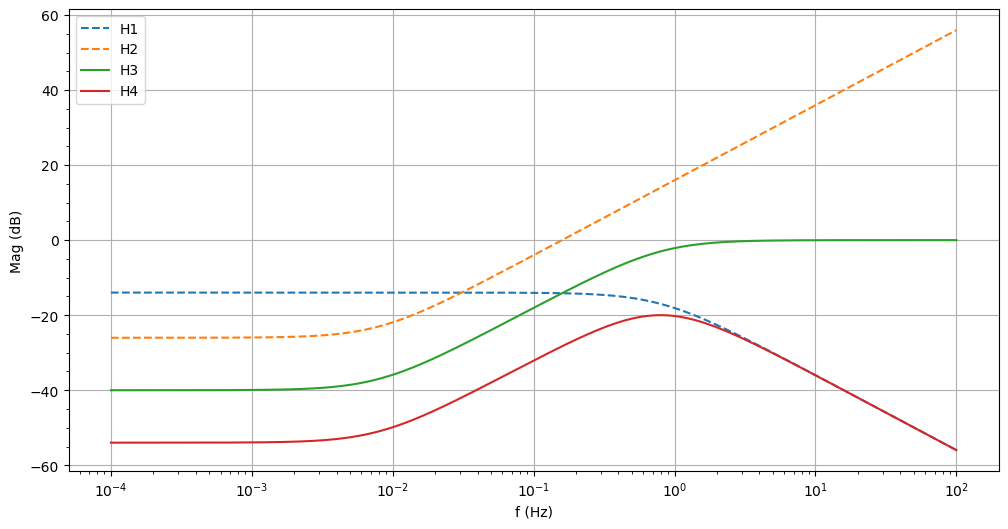

In [12]:
# Your code here
num_bind1 = [1, 0.05]
den_bind1 = [1, 5]
Hs_bind1 = sig.lti(num_bind1, den_bind1)
_, mag_bind1, _ = sig.bode(Hs_bind1, w=w_bode )

num_bind2 = [1, 0.05]
den_bind2 = [1, 10, 25]
Hs_bind2 = sig.lti(num_bind2, den_bind2)
_, mag_bind2, _ = sig.bode(Hs_bind2, w=w_bode )

plt.figure(figsize=(12, 6))
plt.semilogx(f_bode, mag_bode1,'--', label='H1')
plt.semilogx(f_bode, mag_bode2,'--', label='H2')
plt.semilogx(f_bode, mag_bind1, label='H3')
plt.semilogx(f_bode, mag_bind2, label='H4')
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")
plt.legend()



<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python plot: 1 pt</strong>
</span>

From the graph, you should obverve that the third bode or the forth bode is just the sum of the zero term $(s+0.05)$ and pole term $\dfrac{1}{s+5}$. 

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Zero-Pole-Gain Form</h2>
</div>

Since Bode plots can be easily constructed by combining the individual contributions of zeros and poles, it is often preferred to write transfer functions in the **Zero-Pole-Gain (ZPK) form**:

$$H(s) = K \frac{(s - z_1)(s - z_2) \dots (s - z_m)}{(s - p_1)(s - p_2) \dots (s - p_n)}$$

* $K$ is called **Gain**
* $z_1$, $z_2$, ... are **Zeros**
* $p_1$, $p_2$, ... are **Poles**

For example,
$$H(s)=\frac{2s+6}{s^2+3s+2}\text{ can be written as: } H(s)=2\frac{(s+3)}{(s+1)(s+2)}$$

If your original transfer function is more complex, it will be hard to direct write in such form. Instead, we can use ```scipy.signal.tf2zpk``` to automatically obtain the zero-pole-gain form.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html

--------
Use ```scipy.signal.tf2zpk``` to obtain the zero-pole-gain form of this transfer function. Type the result in Markdown.

$$H(s) = \frac{3s^2 + 1515s + 7500}{s^2 + 0.202s + 0.0004}$$


From the zero-pole-gain form, state all cut-off freqs (Hz) corresponding to zeros and poles.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Answer: 1 pt</strong>
</span>

In [15]:
## convert to zpk 
num3 = [3, 1515, 7500]
den3 = [1, 0.202, 0.0004]
print(sig.tf2zpk(num3, den3))

(array([-500.,   -5.]), array([-0.2  , -0.002]), 3.0)


**Answer**

$$H(s)= 3\frac{(s+500)(s+5)}{(s+0.2)(s+0.002)}$$

Plot the Bode Mag of this transfer function. Use ```np.logspace(-5,3,1000)``` as freq-axis scale.

From your plot, can you roughly see 4 cut-off freqs? Can you roughly see the -20 dB/decade segment and -40 dB/decade segment?

In text, indidate where are -20 dB/decade segmant(s) and where are -40 dB/decade segmant(s)?

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Bode Plot: 1 pt</strong>
</span>

Text(0, 0.5, 'Mag (dB)')

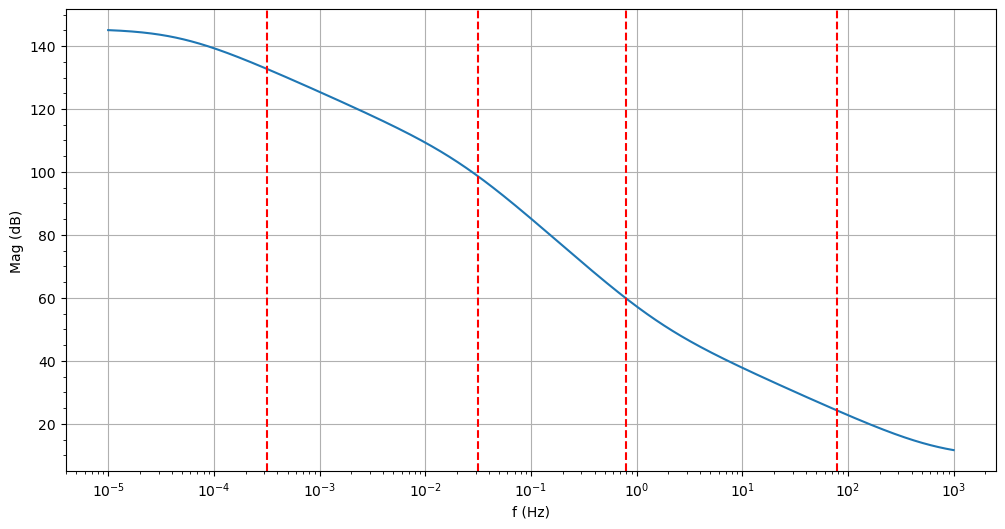

In [25]:
f_3 = np.logspace(-5,3,1000)
w_3 = f_3*2*np.pi
Hs_3= sig.lti(num3, den3)
_, mag_3, _ = sig.bode(Hs_3, w=w_bode )

plt.figure(figsize=(12, 6))
plt.semilogx(f_3, mag_3)
plt.axvline(x=0.2/np.pi/2, color='r', linestyle='--')
plt.axvline(x=0.002/np.pi/2, color='r', linestyle='--')
plt.axvline(x=5/np.pi/2, color='r', linestyle='--')
plt.axvline(x=500/np.pi/2, color='r', linestyle='--')
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 4: 3dB point</h2>
</div>

Presiously, we read the cut-off freqs by finding the intersection of two straight lines.

In fact, there is another way to locate the cut-off freq -- **3dB point**.

In theory, if you have a transfer function with a single pole term:
$$H(s)=\frac{1}{s+p}$$

Its DC Gain is $$|H(0j)|=|\frac{1}{0j+p}|=\frac{1}{p}$$

Its Gain at cut-off freq, $\omega=p$ rad/s is $$|H(pj)|=|\frac{1}{pj+p}|=\frac{1}{\sqrt{(p^2+p^2)}}=\frac{1}{\sqrt 2 p} = \frac{1}{\sqrt 2} \mathrm{DC\:Gain}$$

Convert to dB:

$$20\log_{10}|H(pj)|=20\log_{10}(\frac{1}{\sqrt 2} \mathrm{DC\:Gain}) = 20\log_{10}(\frac{1}{\sqrt 2})+20\log_{10}(\mathrm{DC\:Gain})$$

```python
print(20*np.log10(1/np.sqrt(2)))
-3.0102999566398125
```

So, we can roughly write as:

$$20\log_{10}|H(pj)|=20\log_{10}(\mathrm{DC\:Gain})-3 \mathrm{dB}$$


--------
Thus, on the Bode Mag, if you can find **a specific point where the magnitude drop of -3 dB**. Then this point is the place of cut-off freq.

For the zero term, the conclusion is almost the same, just change to +3 dB.

The next plot help you understand it. It shows the Bode Mag of $H_1(s)=\dfrac{1}{s+5}$:
* The green lines are two straight lines that meet at an intersection
* The red lines drop -3 dB from the flat line.

In summary, both approaches (straight line intersection, or, 3 dB point) can graphically find the cut-off freq.

In [ ]:
# JUST Run it
f_bode_task4 = np.logspace(-4,2,1000)
w_bode_task4 = f_bode_task4*2*np.pi
num_task4 = [1]
den_task4 = [1, 5]
Hs_task4 = sig.lti(num_task4, den_task4)
_, mag_task4, _ = sig.bode(Hs_task4, w=w_bode_task4)
freq_hz_task4 = w_bode_task4 / (2 * np.pi)
dc_gain = 20 * np.log10(1 / 5)

cutoff_mag = dc_gain - 3
cutoff_idx = np.where(mag_task4 <= cutoff_mag)[0][0]  
cutoff_freq_hz = freq_hz_task4[cutoff_idx]

freq_asymp_hz = np.array([0.01, 5, 100]) / (2 * np.pi)  
mag_asymp = [dc_gain, dc_gain, dc_gain - 20 * np.log10(freq_asymp_hz[-1] / freq_asymp_hz[1])]

plt.figure(figsize=(12, 6))
plt.semilogx(freq_hz_task4, mag_task4, linewidth=2)
plt.axvline(cutoff_freq_hz, color='r', linestyle='--')
plt.axhline(cutoff_mag, color='r', linestyle='--')
plt.semilogx(freq_asymp_hz, mag_asymp, 'g:')
plt.grid(True)
plt.minorticks_on()
plt.legend()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


